#Α. Στοιχεία Ομάδας

###Ομάδα Β51

###Μάνκα Σύλβια Δήμητρα - 03113043

###Μιάμης Χρήστος - 03113045

#Β. Εισαγωγή του dataset

###Περιγραφή του dataset

Το παρόν dataset έχει προκύψει από δεδομένα του Landsat Multi-Spectral-Scanner. Τα δεδομένα αυτά είναι δορυφορικές εικόνες οι οποίες έχουν τραβηχτεί σε 4 διαφορετικές φασματικές ζώνες.

Έτσι το κάθε pixel της αρχικής εικόνας διαθέτει 4 τιμές χρώματος, μία σε κάθε φασματική ζώνη. Οι τιμές αυτές στο dataset μας έχουν μετατραπεί από 8-bit δυαδικές τιμές σε δεκαδικές, 0 αντιστοιχεί στο μαύρο και 255 στο λευκό.

Το dataset που διαθέτουμε είναι ένα πολύ μικρό κομμάτι τέτοιων σκηνών, που αποτελείται από 82 x 100 pixels. Κάθε γραμμή του dataset αναφέρεται σε μία γειτονιά 3x3 pixels. Για το κάθε pixel δίνονται οι 4 διαφορετικοί χρωματικοί κωδικοί που αντιπροσωπεύουν την κάθε ζώνη φάσματος. Έτσι η γραμμή αποτελείται συνολικά απο 9x4=36 στοιχεία και ένα επιπλέον που αντιστοιχεί σε μία ετικέτα για να κατηγοριοποιήσουμε το κεντρικό pixel της γειτονιάς. Πιο συγκεκριμένα έχουμε τις εξής ετικέτες για το classification:

| Αριθμός | Κλάση  |
|-----|-------|
| 1   | κόκκινο έδαφος  |
| 2   | βαμβακοκαλλιέργεια  | 
| 3   | γκρι έδαφος  |
| 4  | βρεγμένο γκρι έδαφος  |
| 5   | έδαφος που έχει καλλιεργηθεί με λαχανικά|
| 6   | ένας συνδυασμός όλων των κλάσεων|
| 7  | πολύ βρεγμένο γκρι έδαφος  |



  
 Στο dataset μας δεν εμφανίζεται πουθενά η κλάση 6 συνεπώς έχουμε συνολικά να αποφασίσουμε μεταξύ έξι κλάσεων.
 
 
To dataset είναι χωρισμένο σε train(4435 δείγματα) και test data(2000 δείγματα). Το κάθε δείγμα αποτελείται από 36 αριθμητικά χαρακτηριστικά, και επιπλέον μία στήλη για την κατηγοριοποίηση. 
Δεν έχουμε μη διατεταγμένα χαρακτηριστικά, ούτε ετικέτες για τα ονόματα των χαρακτηριστικών. Επίσης δεν λείπουν τιμές

###Εισαγωγή μέσω Pandas και CSV file

Για την εισαγωγή του dataset χρησιμοποιήσαμε την συνάρτηση read_csv. Της δώσαμε σαν όρισμα το url για το train και test data και τα αποθηκεύσαμε σε δύο διαφορετικά  pandas. Επειδή τα dataset μας δεν ήταν διαχωρισμένα με comma όπως προβλέπεται από το csv δώσαμε όρισμα στην συνάρτηση read_csv sep=' ' ώστε να πραγματοποιεί τον διαχωρισμό των στοιχείων βάση των κενών.

In [0]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
trainData = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn",header=None, sep=' ')
testData= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst",header=None, sep=' ')
print(trainData.shape)
print(testData.shape)


(4435, 37)
(2000, 37)


###Μετατροπή dataset σε συμβατό με scikit-learn

Στο dataset μας έχουμε χωριστά το train και test set. Συνεπώς απαραίτητο είναι να τα ενώσουμε ώστε να κάνουμε τον χωρισμό 70%-30% που είναι το ζητούμενο.

Επιπλέον είναι απαραίτητο να διαχωρίσουμε τα labels από τα features. 

Προτού δημιουργήσουμε τον πίνακα labels από την τελευταία στήλη του train και test dataset θα μετασχηματίσουμε τις ετικέτες ώστε το scikit να καταλαβαίνει την αναπαράσταση που χρησιμοποιούμε. 

Επιλέγουμε την αραιή αναπαράσταση κατά την οποία ο πίνακας των ετικετών έχει σχήμα (n samples, ετικέτα κλάσης). Στην αναπαράσταση αυτή ένα δείγμα της κλάσης 3 θα έχει ετικέτα '2'. Στο σημείο αυτό επίσης αφαιρούμε την κλάση 6 καθώς γνωρίζουμε από την περιγραφή του dataset ότι δεν εμφανίζεται πουθενά.

Χρησιμοποιούμε το mapping:


```
mapping={'1':0,'2':1,'3':2,'4':3,'5':4,'7':5}
```



In [0]:
import numpy as np



#παίρνουμε τις πρώτες 35 στήλες που αντιστοιχούν στα features από τα δοσμένα trainData και testData
features1=trainData.iloc[:,:36].values
features2=testData.iloc[:,:36].values

#δοκιμάσαμε να χρησιμοποιήσουμε μόνο τις στήλες 17-20 που αντιστοιχούν στο κεντρικό pixel για το οποίο γίνεται το classification
#features1=trainData.iloc[:,17:21].values
#features2=testData.iloc[:,17:21].values

print(features1.shape)

#παίρνουμε την τελευταία στήλη που αντιστοιχεί στην κλάση 
df_labels1=trainData.iloc[:,[36]]

mapping = {1: 0, 2:1, 3:2, 4:3, 5:4, 7:5}

labels1=trainData.iloc[:,[36]].replace(mapping).values
labels2=testData.iloc[:,[36]].replace(mapping).values


#με την μέθοδο concatenate ενώνουμε τα έτοιμα train και test sets τόσο στα features όσο και στα lebels
#η επιλογή axis=0 ενώνει τους πίνακες διατηρώντας το μέγεθος των στηλών σταθερό ενώ για axis=None τις ενώνει σε μία ενιαία γραμμή
features=np.concatenate((features1,features2),axis=0)
labels=np.concatenate((labels1,labels2),axis=None)

print((labels))
##print((features))




(4435, 36)
[2 2 2 ... 4 4 4]


###Υπολογισμός ποσοστών εμφάνισης των κλάσεων

Υπολογίζουμε τις συχνότητες εμφάνισης της κάθε κλάσης με την συνάρτηση bincount και στην συνέχεια υπολογίζουμε το ποσοστό.

In [0]:
freq=np.bincount(labels)
print("frequencies:", np.bincount(labels))

percentage=np.zeros((6,))
#υπολογισμός ποσοστού από τις συχνότητες
for i in range(0,6):
    percentage[i]=(freq[i]*100.0)/len(labels)
print(percentage)


frequencies: [1533  703 1358  626  707 1508]
[23.82284382 10.92463092 21.1033411   9.72804973 10.98679099 23.43434343]


Από τα παραπάνω βλέπουμε ότι το train set δεν είναι ισορροπημένο και στο στάδιο της προεπεξεργασίας δεδομένων θα χρησιμοποιήσουμε την μέθοδο της υπερδειγματολειψίας ώστε να μην χάσουμε πληροφορία από τα δεδομένα της εκπαίδευσης.


###Χωρισμός σε train και test set

In [0]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, random_state=78, test_size=0.30)

#Γ. Βaseline Classification

###1.

Στο σημείο αυτό κάνουμε απλή εκπαίδευση στους γνωστούς μας classifiers, dummy, gaussian naive bayes, knn και mlp.

Για κάθε classifier αποθηκεύουμε σε πίνακα τις τιμές f1_micro και f1_macro, ώστε να τα απεικονίσουμε σε bar plot, και τυπώνουμε confusion matrix, f1_micro, f1_macro αλλά και classification report για να πάρουμε τις τιμές precision και recall



###Dummy Classifiers

Επειδή έχουμε multiclass δεδομένα θα εκπαιδεύσουμε συνολικά 9 ταξινομητές.

In [0]:
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#πίνακες που θα κρατάμε τις μετρικές για να τυπώσουμε τα plots
f1_micro = {}
f1_macro = {}

dc_uniform = DummyClassifier(strategy="uniform")
dc_uniform.fit(train,train_labels)

preds = dc_uniform.predict(test)

print("Classification report Dummy uniform")
print(classification_report(test_labels,preds))


f1_micro['D-Uni']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Uni']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy uniform")
print(f1_micro['D-Uni'])
print("F1 macro Dummy uniform")
print(f1_macro['D-Uni'])


print('Confusion Matrix for Dummy uniform')
print(confusion_matrix(test_labels, preds))

#####################

dc_constant0 = DummyClassifier(strategy="constant",constant=0)
dc_constant0.fit(train,train_labels)

preds = dc_constant0.predict(test)

print("Classification report Dummy constant0")
print(classification_report(test_labels,preds))


f1_micro['D-Con0']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con0']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant0")
print(f1_micro['D-Con0'])
print("F1 macro Dummy constant0")
print(f1_macro['D-Con0'])


print('Confusion Matrix for Dummy constant0')
print(confusion_matrix(test_labels, preds))

#####################

dc_constant1 = DummyClassifier(strategy="constant",constant=1)
dc_constant1.fit(train,train_labels)

preds = dc_constant1.predict(test)

print("Classification report Dummy constant1")
print(classification_report(test_labels,preds))

f1_micro['D-Con1']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con1']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant1")
print(f1_micro['D-Con1'])
print("F1 macro Dummy constant1")
print(f1_macro['D-Con1'])


print('Confusion Matrix for Dummy constant1')
print(confusion_matrix(test_labels, preds))

#####################

dc_constant2 = DummyClassifier(strategy="constant",constant=2)
dc_constant2.fit(train,train_labels)

preds = dc_constant2.predict(test)

print("Classification report Dummy constant2")
print(classification_report(test_labels,preds))

f1_micro['D-Con2']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con2']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant2")
print(f1_micro['D-Con2'])
print("F1 macro Dummy constant2")
print(f1_macro['D-Con2'])


print('Confusion Matrix for Dummy constant2')
print(confusion_matrix(test_labels, preds))

#####################

dc_constant3 = DummyClassifier(strategy="constant",constant=3)
dc_constant3.fit(train,train_labels)

preds = dc_constant3.predict(test)

print("Classification report Dummy constant3")
print(classification_report(test_labels,preds))

f1_micro['D-Con3']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con3']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant3")
print(f1_micro['D-Con3'])
print("F1 macro Dummy constant3")
print(f1_macro['D-Con3'])


print('Confusion Matrix for Dummy constant3')
print(confusion_matrix(test_labels, preds))

#####################

dc_constant4 = DummyClassifier(strategy="constant",constant=4)
dc_constant4.fit(train,train_labels)

preds = dc_constant4.predict(test)

print("Classification report Dummy constant4")
print(classification_report(test_labels,preds))

f1_micro['D-Con4']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con4']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant4")
print(f1_micro['D-Con4'])
print("F1 macro Dummy constant4")
print(f1_macro['D-Con4'])


print('Confusion Matrix for Dummy constant4')
print(confusion_matrix(test_labels, preds))

#####################


dc_constant5 = DummyClassifier(strategy="constant",constant=5)
dc_constant5.fit(train,train_labels)

preds = dc_constant5.predict(test)

print("Classification report Dummy constant5")
print(classification_report(test_labels,preds))

f1_micro['D-Con5']=f1_score(test_labels,preds,average='micro')
f1_macro['D-Con5']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy constant5")
print(f1_micro['D-Con5'])
print("F1 macro Dummy constant5")
print(f1_macro['D-Con5'])


print('Confusion Matrix for Dummy constant5')
print(confusion_matrix(test_labels, preds))


#####################


dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_most_frequent.fit(train,train_labels)

preds = dc_most_frequent.predict(test)

print("Classification report Dummy most_frequent")
print(classification_report(test_labels,preds))

f1_micro['D-mfreq']=f1_score(test_labels,preds,average='micro')
f1_macro['D-mfreq']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy most_frequent")
print(f1_micro['D-mfreq'])
print("F1 macro Dummy most_frequent")
print(f1_macro['D-mfreq'])


print('Confusion Matrix for Dummy most_frequent')
print(confusion_matrix(test_labels, preds))


#####################

dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(train,train_labels)

preds = dc_stratified.predict(test)

print("Classification report Dummy stratified")
print(classification_report(test_labels,preds))

f1_micro['D-strat']=f1_score(test_labels,preds,average='micro')
f1_macro['D-strat']=f1_score(test_labels,preds,average='macro')

print("F1 micro Dummy stratified")
print(f1_micro['D-strat'])
print("F1 macro Dummy stratified")
print(f1_macro['D-strat'])


print('Confusion Matrix for Dummy most_stratified')
print(confusion_matrix(test_labels, preds))




Classification report Dummy uniform
              precision    recall  f1-score   support

           0       0.22      0.17      0.19       424
           1       0.11      0.17      0.13       209
           2       0.17      0.14      0.15       419
           3       0.11      0.16      0.13       206
           4       0.13      0.20      0.16       215
           5       0.25      0.18      0.21       458

   micro avg       0.17      0.17      0.17      1931
   macro avg       0.17      0.17      0.16      1931
weighted avg       0.18      0.17      0.17      1931

F1 micro Dummy uniform
0.16623511134127394
F1 macro Dummy uniform
0.16189055890324286
Confusion Matrix for Dummy uniform
[[70 70 92 56 64 72]
 [40 36 40 24 26 43]
 [76 72 57 69 78 67]
 [32 39 26 32 44 33]
 [26 37 39 30 43 40]
 [71 73 81 73 77 83]]
Classification report Dummy constant0
              precision    recall  f1-score   support

           0       0.22      1.00      0.36       424
           1       0.00   

Οι επιδόσεις των dummy ταξινομητών, δεδομένου ότι έχουμ multiclass δεδομένα, είναι πολύ χαμηλές.

###Gaussian Naive Bayes



In [0]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(train,train_labels)

preds = gnb.predict(test)

print("Classification report Gaussian Naive Bayes")
print(classification_report(test_labels,preds))

f1_micro['GNB']=f1_score(test_labels,preds,average='micro')
f1_macro['GNB']=f1_score(test_labels,preds,average='macro')

print("F1 micro GNB")
print(f1_micro['GNB'])
print("F1 macro GNB")
print(f1_macro['GNB'])

print('Confusion Matrix for non-optimized GNB')
print(confusion_matrix(test_labels, preds))



Classification report Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       424
           1       0.99      0.91      0.95       209
           2       0.90      0.90      0.90       419
           3       0.51      0.66      0.57       206
           4       0.60      0.73      0.66       215
           5       0.84      0.76      0.80       458

   micro avg       0.80      0.80      0.80      1931
   macro avg       0.79      0.79      0.79      1931
weighted avg       0.82      0.80      0.81      1931

F1 micro GNB
0.8026929052304506
F1 macro GNB
0.7883561570049515
Confusion Matrix for non-optimized GNB
[[345   0  11   0  68   0]
 [  6 190   0   2  10   1]
 [  5   0 378  35   1   0]
 [  3   0  31 135   3  34]
 [ 22   2   0   6 156  29]
 [  1   0   2  88  21 346]]


Ο Gaussian Bayes estimator πετυχαίνει, χωρίς καμία βελτιστοποίηση τιμή f1_micro=0,803 και f1_macro=0,788.

###ΚΝΝ

In [0]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier() 
clf.fit(train, train_labels)

preds = clf.predict(test)


print("Classification report K nearest neighbors")
print(classification_report(test_labels,preds))

f1_micro['kΝΝ']=f1_score(test_labels,preds,average='micro')
f1_macro['kΝΝ']=f1_score(test_labels,preds,average='macro')


print("F1 micro KNN")
print(f1_micro['kΝΝ'])
print("F1 macro KNN")
print(f1_macro['kΝΝ'])

print('Confusion Matrix for non-optimized kNN')
print(confusion_matrix(test_labels, preds))




Classification report K nearest neighbors
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       424
           1       0.97      0.98      0.98       209
           2       0.90      0.96      0.93       419
           3       0.75      0.71      0.73       206
           4       0.89      0.87      0.88       215
           5       0.92      0.88      0.90       458

   micro avg       0.91      0.91      0.91      1931
   macro avg       0.90      0.90      0.90      1931
weighted avg       0.91      0.91      0.91      1931

F1 micro KNN
0.9129984464008286
F1 macro KNN
0.8993868231447459
Confusion Matrix for non-optimized kNN
[[420   0   3   0   1   0]
 [  0 205   0   2   2   0]
 [  2   0 401  14   0   2]
 [  0   1  37 147   4  17]
 [  8   4   0   3 186  14]
 [  0   1   7  30  16 404]]


Ο knn estimator έχει καλές επιδόσεις το οποίο είναι αναμενόμενο αν λάβουμε υπόψιν το γεγονός ότι τα δεδομένα μας είναι διακριτά.
f1_micro=0.913
f1_macro=0.899

###MLP

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42)

clf.fit(train,train_labels)

preds = clf.predict(test)
print("Classification report MLP")
print(classification_report(test_labels,preds))

f1_micro['MLP']=f1_score(test_labels,preds,average='micro')
f1_macro['MLP']=f1_score(test_labels,preds,average='macro')

print("F1 micro MLP")
print(f1_micro['MLP'])
print("F1 macro MLP")
print(f1_macro['MLP'])


print('Confusion Matrix for MLP')
print(confusion_matrix(test_labels, preds))




Classification report MLP
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       424
           1       0.95      0.97      0.96       209
           2       0.78      0.68      0.73       419
           3       0.50      0.06      0.10       206
           4       0.84      0.76      0.80       215
           5       0.59      0.91      0.72       458

   micro avg       0.77      0.77      0.77      1931
   macro avg       0.77      0.72      0.71      1931
weighted avg       0.77      0.77      0.74      1931

F1 micro MLP
0.7726566545831176
F1 macro MLP
0.7114640190354926
Confusion Matrix for MLP
[[411   0   6   0   7   0]
 [  0 202   0   1   6   0]
 [  4   1 285  10   1 118]
 [  0   3  53  12   0 138]
 [ 12   7   2   0 163  31]
 [  0   0  20   1  18 419]]


Ο mlp estimator με default παραμέτρους δεν τόσο καλή επίδοση, στο στάδιο της βελτιστοποιήσης θα θέσουμε τις παραμέτρους του έτσι ώστε να ανταπεξέρχονται καλύτερα στις ανάγκες του προβλήματος μας.
f1_micro=0.773
f1_macro=0.712

###2.
Με τον παρακάτω κώδικα τυπώνουμε το plot με όλες τις τιμές των f1_micro και f1_macro των ταξινομητών που μελετάμε.


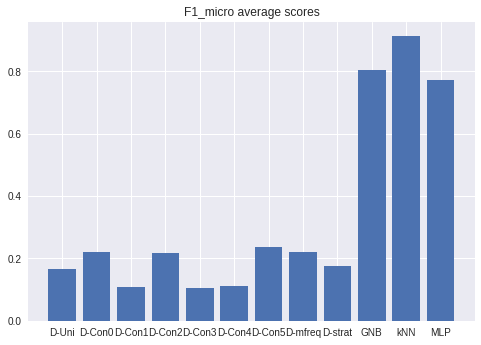

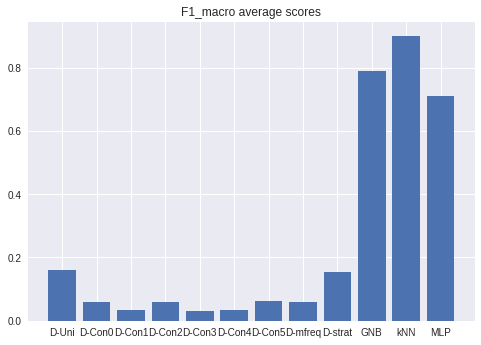

In [0]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

plt.title('F1_micro average scores')
plt.bar(range(len(f1_micro)), list(f1_micro.values()), align='center')
plt.xticks(range(len(f1_micro)), list(f1_micro.keys()))


plt.show()

plt.title('F1_macro average scores')
plt.bar(range(len(f1_macro)), list(f1_macro.values()), align='center')
plt.xticks(range(len(f1_macro)), list(f1_macro.keys()))


plt.show()



###3. Σχολιασμοί


1.   O most frequent Classifier έχει προφανώς ίδια metrics με τον constant 0 καθώς η κλάση 0 είναι η πιο συχνή
2.   Όσον αφορά τον Uniform Classifier δίνει αποτέλεσμα κοντά στο 0.16 αφού παράγει predictions με 100/6 = 16.6%. Αν δεν βάλουμε random_state τότε σε κάθε execution θα παίζει η τιμή του.
3. Τα macro scores είναι πιο μικρά από τα micro καθώς τα macro δεν λαμβάνουν υπόψιν τους την ανισορροπία των κλάσεων
4. O KNN έδωσε πολύ ικανοποιητικό score καθώς τα features και τα labels είναι διακριτά.

5. Όσον αφορά τις τιμές για τα confusion matrices των Constant και Most Frequent τα f1-scores είναι ill-defined καθώς τα True Positives είναι 0 και άρα τα Precision και Recall είναι κι αυτά 0.


**Στην περίπτωση του dataset μας δεν μας απασχολεί να δώσουμε παραπάνω σημασία στο precision ή στο recall καθώς όλες οι κλάσεις μας είναι το ίδιο σημαντικές, δηλα΄δή όσο μας απασχολεί πχ να μην ταξινομήσουμε το 0 στο 5 άλλο τόσο μας απασχολεί να μην ταξινομήσουμε το 5 στο 0. Επειδή γενικά υπάρχει trade off ανάμεσα σε precision και recall, θέλουμε πάνω κάτω να είναι τα ίδια**

#Δ. Βελτιστοποίηση ταξινομητών

 

###1.

##Προεπεξεργασία Δεδομένων

Θα αναφέρουμε τις βασικές στρατηγικές προεπεξεργασίας δεδομένων που θα χρησιμοποιήσουμε στο pipeline και θα τις αρχικοποιήσουμε

###Επιλογή Χαρακτηριστικών -Selector

Το dataset μας αποτελείται συνολικά από 36 χαρακτηριστικά που έχουν όλα το ίδιο πεδίο τιμών και αντιπροσωπέυουν όλα χρωμετικές τιμές των γειτονικών καθώς και του υπό εξέταση pixel.  Το να αφαιρεθέι κάποιο από τα χαρακτηριστικά δεν έχει κάποια λογική ερμηνεία, καθώς σε μία εικόνα όλα τα γειτονικά pixel είναι εξίσου πιθανό να προσφέρουν σημαντική πληροφορία. Αυτό μπορούμε να το διαπιστώσουμε και μελετώντας τον πίνανα με τις διακυμάνσεις.


In [0]:
train_variance = train.var(axis=0)
print(sorted(train_variance))


[177.3865196596509, 179.48027444127052, 179.88936832150807, 180.94769283431643, 181.98707207960248, 182.35147423722808, 183.77556869717404, 183.94950763126778, 185.2571840128671, 276.8808250471662, 277.3073839634158, 277.3632468790312, 278.2708103947078, 279.0042257681341, 279.267707370438, 280.96226188523167, 281.2549742640463, 281.8368191664653, 357.29032684386885, 357.4293155935597, 358.18812723009773, 359.267301968012, 359.606440170412, 360.6657472812782, 361.032210119522, 362.09828282694764, 364.0302511838675, 515.563797987739, 515.7489975360359, 517.4614886925051, 521.8733399401807, 522.3598118033608, 524.1339038182795, 524.6989085979209, 524.8412600581611, 525.0377781423396]


Η μικρότερη τιμή είναι περίπου 177 και η μεγαλύτερη 525. Παρόλο που δεν φαίνεται σωστή απόφαση να χρησιμοποιήσουμε selection θα το διαπιστώσουμε και πειραματικά δοκιμάζοντας να το συμπεριλάβουμε στα στάδια του pipeline. Επιλέγονται δύο μέθοδοι, η variance threshold και η select K best. Για την variance Threshold επιλέγουμε κατώφλι 200 ενώ για την παράμετρο K του δέυτερου selector θα δοκιμάσουμε διάφορες τιμές.

In [0]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.feature_selection import VarianceThreshold


selector = VarianceThreshold(threshold=200)
#selector = SelectKBest(k=10)


###Εξισορρόπηση μη ισσοροπημένων datasets -Sampler

Όπως είδαμε και στην ανάλυση των δεδομένων έχουμε μη ισσοροπημένο dataset.
Στην αναζήτηση της βέλτιστης αρχιτεκτονικής δοκιμάζονται ο RandomOverSampler καθώς και ο RandomUnderSampler.


In [0]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


In [0]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.under_sampling import RandomUnderSampler

# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)


###Κανονικοποίηση Χαρακτηριστικών - Scaler

Τα χαρακτηριστικά μας αντιπροσωπεύουν τιμές χρωματών και το ευρός τους είναι από 0 έως 255. Για τον λόγο αυτό περιμένουμε ότι η κανονικοποιήση των χαρακτηριστικών να μην επηρεάζει ιδιαίτερα το αποτέλεσμα, ή και να έχει αρνητική επίδραση στην επίδοση του ταξινομητή. Θα δοκιμάσουμε τον StandardScaler και τον MinMaxScaler.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

###Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών - PCA

Η μέθοδος PCA είναι πολύ χρήσιμη καθώς 




In [0]:
from sklearn.decomposition import PCA

pca = PCA()

##Ταξινομητές

Τώρα που έχουμε αρχικοποιήσει όλα τα στάδια που θα χρησιμοποιήσουμε στο pipeline θα αναζητήσουμε την βέλτιστη αρχιτεκτονική των μετασχηματιστών και τιμές των παραμέτρων.

In [0]:
import time

#πίνακες που θα κρατάμε τις μετρικές για να τυπώσουμε τα plots
f1_micro_opt = {}
f1_macro_opt = {}

time_micro={}
time_macro={}

###Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score




In [0]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
selector = VarianceThreshold()
#ros = RandomOverSampler(random_state=0)
ros=RandomUnderSampler(random_state=0)
cv_scores = []

n_comp=[11,13,15,17,19,21]

pca = PCA()

gnb = GaussianNB()
pipe = Pipeline(steps=[('gnb', gnb)])

scores = cross_val_score(pipe, train, train_labels, cv=5, scoring='f1_micro')
cv_scores.append(scores.mean())

pipe = Pipeline(steps=[('pca', pca), ('gnb', gnb)])

estimator = GridSearchCV(pipe, dict(pca__n_components=n_comp), cv=5,scoring='f1_micro', n_jobs=1)
estimator.fit(train,train_labels)
print(estimator.best_params_)
print(estimator.best_score_)
cv_scores.append(estimator.best_score_)

pipe = Pipeline(steps=[('sampler', ros), ('gnb', gnb)])

scores = cross_val_score(pipe, train, train_labels, cv=5, scoring='f1_micro')
cv_scores.append(scores.mean())

pipe = Pipeline(steps=[ ('sampler', ros), ('pca', pca), ('gnb', gnb)])

estimator = GridSearchCV(pipe, dict(pca__n_components=n_comp), cv=5,scoring='f1_micro', n_jobs=1)
estimator.fit(train,train_labels)
print(estimator.best_params_)
print(estimator.best_score_)
cv_scores.append(estimator.best_score_)

pipe = Pipeline(steps=[('scaler', scaler), ('gnb', gnb)])

scores = cross_val_score(pipe, train, train_labels, cv=5, scoring='f1_micro')
cv_scores.append(scores.mean())

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', gnb)])

estimator = GridSearchCV(pipe, dict(pca__n_components=n_comp), cv=5,scoring='f1_micro', n_jobs=1)
estimator.fit(train,train_labels)
print(estimator.best_params_)
print(estimator.best_score_)
cv_scores.append(estimator.best_score_)

pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('gnb', gnb)])

scores = cross_val_score(pipe, train, train_labels, cv=5, scoring='f1_micro')
cv_scores.append(scores.mean())

pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])

estimator = GridSearchCV(pipe, dict(pca__n_components=n_comp), cv=5,scoring='f1_micro', n_jobs=1)
estimator.fit(train,train_labels)
print(estimator.best_params_)
print(estimator.best_score_)
cv_scores.append(estimator.best_score_)


print(cv_scores)



{'pca__n_components': 19}
0.8339253996447602
{'pca__n_components': 17}
0.8536856127886323
{'pca__n_components': 19}
0.8394760213143873
{'pca__n_components': 13}
0.8441385435168739
[0.7950585464586692, 0.8339253996447602, 0.7932842183531644, 0.8536856127886323, 0.7950585464586692, 0.8394760213143873, 0.7932842183531644, 0.8441385435168739]


Στον ταξινομητή αυτόν δεν έχουμε υπερπαραμέτρους να βελτιστοποιήσουμε συνεπώς γίνεται χρήση της GridsearchCV μόνο για την παράμετρο n_components του pca. Για να βρούμε τον βέλτιστο συνδυασμό σταδίων προεπεξεργασίας τα δοκιμάζουμε όλους τους συνδυασμούς pipeline που έχουμε στην διαθεσή μας. Επιλέγουμε να μην δοκιμάσουμε κανένα selector καθώς όλα τα χαρακτηριστικά έχουν πολύ κοντινά variances και να αφαιρέσουμε κάποια από αυτά δεν φαίνεται σωστή επιλογή. Κάναμε ορισμένες μετρήσεις και πράγματι ο selector πάντα έριχνε τις επιδόσεις.

Έχουμε τα στάδια scaler (δοκιμάζουμε πρώτα τον Standard (1) και έπειτα τον MinMax(2)), sampler, και pca. 

Δοκιμάζουμε όλους τους συνδυασμούς για τα στάδια προεπεξεργασίας και τα αποθηκεύουμε σε έναν πίνακα. Για κάθε συνδυασμό αντιστοιχεί ένα index στον πίνακα σύμφωνα με την κωδικοποίηση:


|Scaler | Sampler | PCA  | 
|-----|-------|-------------|
|0|0|0| 
|0|0|1|
|0|1|0|
|0|1|1|
|1|0|0|
|1|0|1|
|1|1|0|
|1|1|1|

Πήραμε τα εξής αποτελέσματα για την μετρική f1_micro:

micro StandardScaler
[0.7950585464586692, 0.83348134991119[n=17], 0.7932842183531644, 0.8532415630550622[n=17], 0.7950585464586692, 0.8370337477797514[n=19], 0.7932842183531644, 0.8392539964476021[n=13]]

micro MinMaxScaler
[0.7950585464586692, 0.83348134991119[n=17], 0.7932842183531644, 0.852797513321492[n=17], 0.7950585464586692, 0.8396980461811723[n=21], 0.7932842183531644, 0.8443605683836589[n=13]]

Για το κάθε αποτέλεσμα στον πίνακα έχουμε σημειώσει για ποιά τιμή n_comp του PCA την πήραμε.

***Τα καλύτερα αποτελέσματα για f1_micro τα παίρνουμε με αρχιτεκτονική: OverSampler και PCA(17)***

Επαναλαμβάνουμε την διαδικασία για f1_macro.


macro Standard
[0.7753699330928873, 0.7782949013261041[n=19], 0.7743806271818945, 0.820937794748363[n=17], 0.7753699330928873, 0.7787878438358593[n=19], 0.7743806271818945, 0.8033767857537292[n=13]]

macro MinMax
[0.7753699330928873, 0.7777658350901553[n=19], 0.7743806271818945, 0.8205602020351909[n=17], 0.7753699330928873, 0.7980031658589034[n=13], 0.7743806271818945, 0.8168063811502061[n=13]]

***Παρατηρούμε ότι την καλύτερη επίδοση και ως προς f1_macro την παίρνουμε πάλι για OverSampler και PCA(17).***






In [0]:

ros = RandomOverSampler(random_state=0)
pca=PCA(17)

pipe = Pipeline(steps=[ ('sampler', ros), ('pca', pca), ('gnb', gnb)])
start_time = time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
time_micro['GNB']=time.time() - start_time
time_macro['GNB']=time_micro['GNB']
print(f1_score(test_labels,preds,average='micro'))
f1_micro_opt['GNB']=(f1_score(test_labels,preds,average='micro'))


print(f1_score(test_labels,preds,average='macro'))
f1_macro_opt['GNB']=(f1_score(test_labels,preds,average='macro'))

#τυπώνουμε ένα classification report και confusion matrix καθώς η αρχιτεκτονική για f1-micro και f1-macro ταυτίζονται
print("Classification report for optimized GNB")
print(classification_report(test_labels,preds))
print('Confusion Matrix for optimized GNB')
print(confusion_matrix(test_labels, preds))


0.84774728120145
0.8220451047055054
Classification report for optimized GNB
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       424
           1       0.89      1.00      0.94       209
           2       0.87      0.91      0.89       419
           3       0.54      0.50      0.52       206
           4       0.79      0.79      0.79       215
           5       0.84      0.80      0.82       458

   micro avg       0.85      0.85      0.85      1931
   macro avg       0.82      0.83      0.82      1931
weighted avg       0.85      0.85      0.85      1931

Confusion Matrix for optimized GNB
[[405   3   4   2   9   1]
 [  0 208   0   0   1   0]
 [  2   3 382  28   3   1]
 [  0   9  48 104   3  42]
 [  5   7   0   8 170  25]
 [  0   3   7  50  30 368]]


###KNN

Για τον αλγόριθμο αυτό πρέπει να βελτιστοποιήσουμε τις παραμέτρους n_neighbors, metric, weights.
Για το n_neighbors δοκιμάζουμε τιμές 5,7,9,11,13, metric: minkowski και η παράμετρος p να παίρνει τιμές 1,2,3. Η minkowski με p=1 είναι η manhattan, με p=2 είναι η euclidean. Για τα weights βάζουμε τιμές distance και uniform. 
Κάνουμε χρήση της gridsearchCV για την εύρεση του βέλτιστου πλέγματος για κάθε δυνατή αρχιτεκτονική.

Ως προς την αρχιτεκτονική δοκιμάζουμε πάλι 2 διαφορετικούς scalers και 2 διαφορετικούς samplers για τους 8 συνδυασμούς scaler, sampler,pca. 
Στην αναζήτηση πλέγματος προσθέτουμε επίσης την παράμετρο pca components.

Ανάλογα με την αρχιτεκτονική, αλλάζουν οι βέλτιστες παράμετροι. Όταν μία παράμετρος προκύπτει στα ακρά του διαστήματος επαναλαμβάνουμε την μέτρηση με νέες τιμές στην παράμετρο ώστε να είμαστε βέβαιοι ότι βρήκαμε την βέλτιστη τιμή παραμέτρου.

Δουλέψαμε λοιπόν με τον παρακάτω κώδικα κάνοντας εξαντλητική ανάζητηση σε όλες τις αρχιτεκτονικές.






In [0]:
from sklearn import neighbors

#scaler = StandardScaler()
scaler = MinMaxScaler()

ros = RandomOverSampler(random_state=0)
#ros=RandomUnderSampler(random_state=0)


clf = neighbors.KNeighborsClassifier(n_jobs=-1)


pca = PCA()

#scaler = StandardScaler()
scaler = MinMaxScaler()

ros = RandomOverSampler(random_state=0)

n_comp=[11,13,15,17,19,21,23]
k=[1,3,5,7,9,11,13,15]
p=[1,2,3]
metric=['minkowski']
weights=['uniform','distance']



pipe = Pipeline(steps=[('scaler', scaler),('sampler',ros),('pca',pca),('kNN', clf)], memory = 'tmp') 

estimator = GridSearchCV(pipe, dict(pca__n_components=n_comp,kNN__p=p,kNN__n_neighbors=k,kNN__weights=weights,kNN__metric=metric), cv=5,scoring='f1_macro', n_jobs=1)
estimator.fit(train,train_labels)
print(estimator.best_params_)
print(estimator.best_score_)




Για κάθε pipeline κρατήσαμε την βέλτιστη τιμή f1_micro και τις βέλτιστες υπερπαραμέτρους. 
Οι μετρήσεις είναι οι εξής:

0:Κανένα στάδιο προεπεξεργασίας
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.9063055062166963

1:PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 15}
0.9096358792184724

2:OverSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 9, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8932060390763765


2:UnderSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 9, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8932060390763765

3:OverSampler, PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 2, 'kNN__weights': 'uniform', 'pca__n_components': 15}
0.9043072824156305

3:UnderSampler, PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 15}
0.8898756660746003

4:StandardScaler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'uniform'}
0.9063055062166963

4:MinMaxScaler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.9047513321492007

5:StandardScaler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 19}
0.9091918294849023

5:MinMaxScaler, PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 2, 'kNN__weights': 'uniform', 'pca__n_components': 15}
0.9094138543516874

6:StandardScaler, OverSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 7, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8874333925399644

6.StandardScaler, UnderSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 7, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8874333925399644

6:MinMaxScaler, OverSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 9, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8940941385435168

6:MinMaxScaler, UnderSampler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 7, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8874333925399644

7:StandardScaler, OverSampler, PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 11, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 13}
0.8936500888099467

7:StandardScaler, UnderSampler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 2, 'kNN__weights': 'distance', 'pca__n_components': 19}
0.8923179396092362

7:MinMaxScaler, OverSampler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 9, 'kNN__p': 2, 'kNN__weights': 'distance', 'pca__n_components': 15}
0.8894316163410302

7:MinMaxScaler, UnderSampler,PCA
s{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 9, 'kNN__p': 2, 'kNN__weights': 'distance', 'pca__n_components': 15}
0.8894316163410302

***To βέλτιστο αποτέλεσμα ως προς f1_micro το παίρνουμε με αρχιτεκτονική: PCA(15), estimator,
για k=3, minkowski με p=1, weights: distance.***

Αυτό που παρατηρούμε είναι ότι έχουμε πολύ μικρές μεταβολές στην επίδοση από αρχιτεκτονική σε αρχιτεκτονική.

Παρατηρούμε ότι σε όλες τις περιπτώσεις ο OverSampler έδωσε ίδια ή καλύτερα αποτελέσματα από τον UnderSampler, ενώ για τους scalers δεν μπορούμε να βγάλουμε κάποιο συμπέρασμα.Για τον λόγο αυτό για το f1_macro δεν θα ασχοληθούμε με τον UnderSampler.

0:
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 2, 'kNN__weights': 'distance'}
0.8839504647590436

1:PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 15}
0.8896222535237469

2:
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform'}
0.884279234681473

3:RandomOverSampler, PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 11, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 17}
0.8826814516268267

4:StandardScaler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 5, 'kNN__p': 1, 'kNN__weights': 'distance'}
0.8853990167479344

4:MinMaxScaler
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform'}
0.8860615781064177

5:StandardScaler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 2, 'kNN__weights': 'uniform', 'pca__n_components': 15}
0.8913308193599334

5:MinMaxScaler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 3, 'kNN__p': 1, 'kNN__weights': 'distance', 'pca__n_components': 17}
0.89202110137818


6:MinMax
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform'}
0.8860615781064177


6:Standard
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform'}
0.8879828001745423

7:StandardScaler,Sampler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform', 'pca__n_components': 19}
0.8913247954203573


7:MinMaxScaler,Sampler,PCA
{'kNN__metric': 'minkowski', 'kNN__n_neighbors': 1, 'kNN__p': 1, 'kNN__weights': 'uniform', 'pca__n_components': 17}
0.8928541603025623

***To βέλτιστο αποτέλεσμα ως προς f1_macro το παίρνουμε με αρχιτεκτονική: MinMaxScaler, Sampler, PCA(17), estimator,
για k=1, minkowski με p=1, weights: uniform***


Για τις βέλτιστες αρχιτεκτονικές θα υπολογίσουμε τον συνολικό χρόνο που παίρνει το fit και το predict στο test set, αλλά και τις τελικές τιμές f1_micro και f1_macro που προκύπτουν στο test set.

In [0]:
pca=PCA(15)
clf = neighbors.KNeighborsClassifier(n_neighbors=3,weights='distance',p=1,metric='minkowski',n_jobs=-1)

pipe = Pipeline(steps=[('pca',pca),('kNN', clf)], memory = 'tmp') 
start_time = time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
time_micro['KNN']=time.time() - start_time
print(f1_score(test_labels,preds,average='micro'))
f1_micro_opt['KNN']=(f1_score(test_labels,preds,average='micro'))

print("Classification report for optimized(f1-micro) KNN")
print(classification_report(test_labels,preds))
print('Confusion Matrix for optimized (f1-micro) KNN')
print(confusion_matrix(test_labels, preds))

scaler = MinMaxScaler()
ros = RandomOverSampler(random_state=0)
pca=PCA(17)
clf = neighbors.KNeighborsClassifier(n_neighbors=3,weights='uniform',p=1,metric='minkowski',n_jobs=-1)

pipe = Pipeline(steps=[('scaler',scaler),('sampler',ros),('pca',pca),('kNN', clf)], memory = 'tmp') 
start_time = time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)
time_macro['KNN']=time.time() - start_time
print(f1_score(test_labels,preds,average='macro'))
f1_macro_opt['KNN']=(f1_score(test_labels,preds,average='macro'))

print("Classification report for optimized(f1-macro) KNN")
print(classification_report(test_labels,preds))
print('Confusion Matrix for optimized (f1-macro) KNN')
print(confusion_matrix(test_labels, preds))




0.9083376488865874
Classification report for optimized(f1-micro) KNN
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       424
           1       0.97      0.98      0.97       209
           2       0.89      0.94      0.91       419
           3       0.74      0.70      0.72       206
           4       0.91      0.86      0.89       215
           5       0.91      0.89      0.90       458

   micro avg       0.91      0.91      0.91      1931
   macro avg       0.90      0.89      0.90      1931
weighted avg       0.91      0.91      0.91      1931

Confusion Matrix for optimized (f1-micro) KNN
[[419   0   4   0   1   0]
 [  1 205   0   1   2   0]
 [  2   2 393  17   0   5]
 [  0   1  37 145   4  19]
 [  7   3   1   3 185  16]
 [  0   1   8  31  11 407]]
0.8783734085691509
Classification report for optimized(f1-macro) KNN
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       424
 

### MLP
Για το optimization του MLP, επειδή οι παράμετροι είναι πάρα πολλές και ο συνδυασμός τους απαγορευτικός, για να μειώσουμε τους συνδυασμούς θα ακολουθήσουμε την εξής στρατηγική:
Θα βρούμε πρώτα ποια στρατηγική θα ακολουθήσουμε για το preprocessing για έναν MLP με default παραμέτρους και στη συνέχεια γι αυτό το preprocessing θα βελτιώσουμε τις παραμέτρους του MLP.

Στον παρακάτω κώδικα, ουσιαστικά για κάθε βήμα του preprocessing χρησιμοποιούμε διάφορες επιλογές.
Για παράδειγμα στο στάδιο του feature selection χρησιμοποιούμε τον SelectKBest με παραμέτρους [15,20,30],
για scaling χρησιμοποιούμε τον MinMaxScaler και τον StandardScaler(),
για sampling χρησιμοποιούμε τον RandomOverSampler και τον RandomUnderSampler,
και τέλος για feature extraction χρησιμοποιούμε PCA.

ΠΡΟΣΟΧΗ !!!
Στις λίστες με τα βήματα βάζουμε και το 0 που σημαίνει ότι αυτό το βήμα τις προεπεξεργασίας θα παραληφθεί.
Για παράδειγμα έχουμε selectors = [0, SelectKBest()] που σημαίνει ότι τη μία φορά δε θα κάνουμε καθόλου επιλογή χαρακτηριστικών από το train set και την επόμενη θα χρησιμοποιήσουμε τον SelectKBest.

Επειδή το παρακάτω block code χρειάζεται αρκετή ώρα για να τρέξει, στο επόμενο markdown block έχουμε αποθηκεύσει την έξοδό του καλού κακού.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

clf = MLPClassifier()

select_k = [15,20,30]
n_components = [5,8,12]

selectors = [0, SelectKBest()]
scalers = [0, MinMaxScaler(), StandardScaler()]
samplers = [0, RandomOverSampler(random_state = 100), RandomUnderSampler(random_state = 100)]
extractors = [0, PCA()]


steps = []
dictionary = {}
best_score = 0.0


for selector in selectors:
    if selector != 0:
        s1 = [('selector', selector)]
        dictionary['selector__k'] = select_k
    else:
        s1 = []
        dictionary.pop('selector__k', None)
        
    for scaler in scalers:
        if scaler != 0:
            s2 = [('scaler', scaler)]
        else:
            s2 = []
        
        for sampler in samplers:
            if sampler != 0:
                s3 = [('sampler', sampler)]
            else:
                s3 = []
            
            for pca in extractors:
                if pca != 0:
                    s4 = [('pca', pca)]
                    dictionary['pca__n_components'] = n_components
                else:
                    s4 = []
                    dictionary.pop('pca__n_components', None)
                
                s5 = [('mlp',clf)]
                steps = s1 + s2 + s3 + s4 + s5

                #print(steps)                
                #print(dictionary)
                
                pipe = Pipeline(steps)
                estimator = GridSearchCV(pipe, dictionary, cv=5, n_jobs=-1)
                
                estimator.fit(train, train_labels)
                
                estimator_score = estimator.best_score_
                
                if estimator_score > best_score:
                    best_score = estimator_score
                    best_params = estimator.best_params_
                    best_steps = steps
                    
                
                
print(best_score)
print(best_params)
print(best_steps)


Το παραπάνω block κώδικα τύπωσε τα εξής αποτελέσματα:

0.9058614564831261


{'pca__n_components': 12}


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=100, ratio=None, return_indices=False,
         sampling_strategy='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]

Παρατηρούμε ότι δεν επιλέχθηκε να γίνει SelectKBest που σημαίνει ότι όλα τα χαρακτηριστικά μας είναι εξίσου σημαντικά.
Για scaler επιλέχθηκε ο StandardScaler, για sampler ο RandomOverSampler και τέλος επιλέχθηκε να γίνει PCA με καλύτερη παράμετρο τις 12 κύριες συνιστώσες.

Βάσει λοιπόν αυτών των αποτελεσμάτων θα κάνουμε τώρα optimize στις παραμέτρους του MLP.

In [0]:
steps = [('scaler',  StandardScaler() ), ('sampler', RandomOverSampler(random_state = 100) ), ('pca', PCA(n_components = 12)), ('mlp', MLPClassifier())]

dictionary = {}
dictionary['mlp__hidden_layer_sizes'] = [(70,), (100,), (150,)]
dictionary['mlp__activation'] = ['logistic', 'tanh', 'relu']
dictionary['mlp__solver'] = ['lbfgs', 'sgd', 'adam']
dictionary['mlp__max_iter'] = [190, 200, 240]
dictionary['mlp__learning_rate'] = ['constant', 'invscaling', 'adaptive']
dictionary['mlp__alpha'] = [0.0001, 0.001, 0.01]


In [0]:
pipe = Pipeline(steps)
estimator = GridSearchCV(pipe, dictionary, cv=5,scoring='f1_micro', n_jobs=-1)


estimator.fit(train, train_labels)
                
estimator.best_score_

estimator.best_params_
           
print('F1-Micro')
print(estimator.best_score_)
print(estimator.best_params_)

Το προηγούμενο block έδωσε έξοδο:

F1-Micro
0.9078596802841918
{'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (150,), 'mlp__solver': 'adam', 'mlp__learning_rate': 'constant', 'mlp__max_iter': 240}

Παρατηρούμε ότι δεν υπάρχει ιδιαίτερη βελτίωση όταν πειράζουμε τους παραμέτρους του MLP. Πιο σημαντικό απ' ότι φαίνεται είναι τα στάδια της προεπεξεργασίας

In [0]:
pipe = Pipeline(steps)
estimator = GridSearchCV(pipe, dictionary, cv=5,scoring='f1_macro', n_jobs=-1)


estimator.fit(train, train_labels)
                
estimator.best_score_

estimator.best_params_
           
print('F1-Macro')
print(estimator.best_score_)
print(estimator.best_params_)

F1-Macro
0.8955178235107117
{'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (150,), 'mlp__solver': 'adam', 'mlp__learning_rate': 'constant', 'mlp__max_iter': 240}

In [0]:
from sklearn.metrics import f1_score

mlp_micro = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(150,), learning_rate='constant', max_iter=240, solver='adam')
mlp_macro = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', max_iter=200, solver='adam')



pipe = Pipeline(steps=[('scaler', StandardScaler()),('sampler', RandomOverSampler(random_state=100)), ('pca', PCA(n_components = 12)), ('mlp',mlp_micro)], memory = 'tmp') 

start_time = time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)

t = (time.time() - start_time)

time_micro['MLP'] = t

print('Total time :', t)

print('Classification report for Optimal MLP Micro\n')
print(classification_report(test_labels, preds))


f1_micro1 = f1_score(test_labels, preds, average='micro')
f1_micro_opt['MLP']=f1_micro1
print('f1-micro :', f1_micro1)
print('\n\n')

print('Confusion Matrix\n')
print(confusion_matrix(test_labels, preds), '\n')

acc = 100*accuracy_score(test_labels, preds)
print('Accuracy percentage is %.2f %% \n' % acc)
print('- - - - - - - - - - - - - - - - - - - - - - - - - -\n')



pipe = Pipeline(steps=[('scaler', StandardScaler()),('sampler', RandomOverSampler(random_state=100)), ('pca', PCA(n_components = 12)), ('mlp',mlp_macro)], memory = 'tmp') 

start_time = time.time()
pipe.fit(train,train_labels)
preds = pipe.predict(test)

t = (time.time() - start_time)

time_macro['MLP'] = t

print('Total time :', t)

print('Classification report for Optimal MLP Macro\n')
print(classification_report(test_labels, preds))


f1_macro1 = f1_score(test_labels, preds, average='macro')
f1_macro_opt['MLP']=f1_macro1
print('f1-macro :', f1_macro1)
print('\n\n')

print('Confusion Matrix\n')
print(confusion_matrix(test_labels, preds), '\n')

acc = 100*accuracy_score(test_labels, preds)
print('Accuracy percentage is %.2f %% \n' % acc)
print('- - - - - - - - - - - - - - - - - - - - - - - - - -\n')

Total time : 22.203887224197388
Classification report for Optimal MLP Micro

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       424
           1       0.98      0.99      0.99       209
           2       0.90      0.92      0.91       419
           3       0.69      0.75      0.72       206
           4       0.86      0.89      0.87       215
           5       0.93      0.85      0.89       458

   micro avg       0.90      0.90      0.90      1931
   macro avg       0.89      0.90      0.89      1931
weighted avg       0.91      0.90      0.90      1931

f1-micro : 0.9041947177628172



Confusion Matrix

[[418   0   5   0   1   0]
 [  0 207   0   0   2   0]
 [  0   0 385  28   0   6]
 [  2   0  31 154   5  14]
 [  5   4   0   3 192  11]
 [  0   0   6  38  24 390]] 

Accuracy percentage is 90.42 % 

- - - - - - - - - - - - - - - - - - - - - - - - - -

Total time : 6.695791959762573
Classification report for Optimal MLP Macro

  

###2. Πίνακες με χρόνους εκτέλεσης

Αφού βρήκαμε την βέλτιστη αρχιτεκτονική  και τις βέλτιστες υπερπαραμέτρους για τους εκτιμητές Gaussian Naive Bayes, KNN και MLP ως προς μετρικές f1-micro και f1-macro, τις εφαρμόσαμε ώστε να εκπαιδεύσουμε τους ταξινομητές και να κάνουμε predict στα test δεδομένα. Μετρήσαμε τον συνολικό χρόνο που χρειάστηκε ο κάθε εκτιμητής για το fit και το predict. 
Επειδή όμως για κάθε μετρική μπορεί να προκύψουν διαφορετική αρχιτεκτονική και υπερπαράμετροι πήραμε χρόνο για τον βέλτιστο εκτιμητή ως προς f1-micro και ως προς f1-macro.

In [0]:

names={'GNB','KNN','MLP'}
df_times = pd.DataFrame([time_micro], columns = names)
df_times.rename(index={0:'Time'} , inplace=True)

print('EXECUTION TIME (F1-MICRO OPTIMIZATION) (ms)\n')
print(df_times)

print('\n')
names={'GNB','KNN','MLP'}
df_times = pd.DataFrame([time_macro], columns = names)
df_times.rename(index={0:'Time'} , inplace=True)

print('EXECUTION TIME (F1-MACRO OPTIMIZATION) (ms)\n')
print(df_times)

EXECUTION TIME (F1-MICRO OPTIMIZATION) (ms)

           GNB      KNN        MLP
Time  0.118339  0.22711  22.203887


EXECUTION TIME (F1-MACRO OPTIMIZATION) (ms)

           GNB       KNN       MLP
Time  0.118339  0.238163  6.695792


###3.Διαγράμματα f1-micro και f1-macro

Όπως ακριβώς και στο Γ2. τώρα τυπώνουμε τις μετρικές με τους βελτιστοποιημένους εκτιμητές.



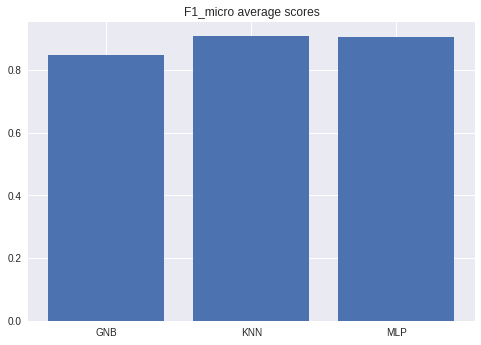

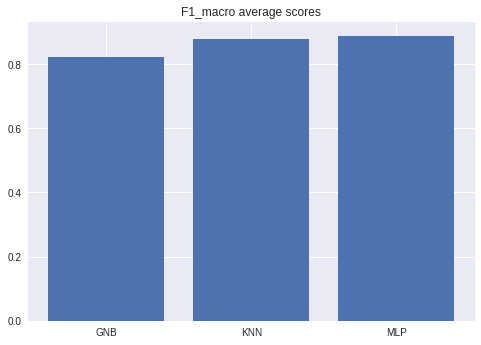

In [0]:
# Κάνουμε import την matplotplib
import matplotlib.pyplot as plt

plt.title('F1_micro average scores')
plt.bar(range(len(f1_micro_opt)), list(f1_micro_opt.values()), align='center')
plt.xticks(range(len(f1_micro_opt)), list(f1_micro_opt.keys()))


plt.show()

plt.title('F1_macro average scores')
plt.bar(range(len(f1_macro_opt)), list(f1_macro_opt.values()), align='center')
plt.xticks(range(len(f1_macro_opt)), list(f1_macro_opt.keys()))


plt.show()

###4. Μεταβολή επίδοσης

Στο σημείο αυτό συγκρίνουμε τις μετρικές που πήραμε στο Γ. με αυτές που πήραμε από τους βελτιστοποιημένους εκτιμητές.

In [0]:
f1={}
f2={}

f1['GNB']=f1_micro['GNB']
f1['KNN']=f1_micro['kΝΝ']
f1['MLP']=f1_micro['MLP']

f2['GNB']=f1_macro['GNB']
f2['KNN']=f1_macro['kΝΝ']
f2['MLP']=f1_macro['MLP']

names={'GNB','KNN','MLP'}
df_times = pd.DataFrame([f1], columns = names)
df_times.rename(index={0:'f1-micro'} , inplace=True)


print('f1-micro for non optimized estimators\n')
print(df_times)
print('\n')

df_times = pd.DataFrame([f2], columns = names)
df_times.rename(index={0:'f1-macro'} , inplace=True)

print('f1-macro for non-optimized estimators\n')
print(df_times)
print('\n')


names={'GNB','KNN','MLP'}

df_times = pd.DataFrame([f1_micro_opt], columns = names)
df_times.rename(index={0:'f1-micro'} , inplace=True)

print('f1-micro for optimized estimators\n')
print(df_times)
print('\n')


df_times = pd.DataFrame([f1_macro_opt], columns = names)
df_times.rename(index={0:'f1-macro'} , inplace=True)

print('f1-macro for optimized estimators\n')
print(df_times)
print('\n')





f1-micro for non optimized estimators

               GNB       KNN       MLP
f1-micro  0.802693  0.912998  0.772657


f1-macro for non-optimized estimators

               GNB       KNN       MLP
f1-macro  0.788356  0.899387  0.711464


f1-micro for optimized estimators

               GNB       KNN       MLP
f1-micro  0.847747  0.908338  0.904195


f1-macro for optimized estimators

               GNB       KNN       MLP
f1-macro  0.822045  0.878373  0.887509




###5. Σχολιασμός Αποτελεσμάτων
Παρατηρούμε ότι όλοι οι ταξινομητές έδωσαν καλύτερα αποτελέσματα όταν έγινε το optimization κάτι το οποίο ήταν αναμενόμενο. 
Μάλιστα, την σημαντικότερη βελτίωση την είχε ο MLP. 
Ο KNN ήταν αυτός που έδωσε τα καλύτερα αποτελέσματα και με default παραμέτρους αλλά και με optimized preprocessing που είναι λογικό καθώς ο χώρος των χαρακτηριστικών μας είναι διακριτός. 
Επίσης παρατηρήσαμε ότι αυτό που βελτίωνε τα αποτελέσματα δεν ήταν τόσο οι παράμετροι των ταξινομητών όσο τα στάδια της προεπεξεργασίας
και οι μέθοδοι / παράμετροι που χρησιμοποιήθηκαν γι' αυτήν.
Τα macro scores είναι πιο μικρά από τα micro καθώς τα macro δεν λαμβάνουν υπόψιν τους την ανισορροπία των κλάσεων.
Επίσης όσον αφορά τα confusion matrices, παρατηρούμε μια ομοιομορφία όσον αφορά τα false positives και true negatives κάτι το οποίο είναι επιθυμητό καθώς δείχνει ότι δεν υπάρχει bias στο prediction των ταξινομητών μας (gaussian, knn και mlp).
Τέλος, οι χρόνοι για fit και predict των optimized classifiers είναι αισθητά μεγαλύτεροι με τον MLP να δίνει αρκετά μεγάλο χρόνο.